In [78]:
#Read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
reg = pd.read_csv("regression-data-set.csv")

In [79]:
def spicyCosine(x,a,b,c,d):
    return a + b * np.cos(c * x + d)

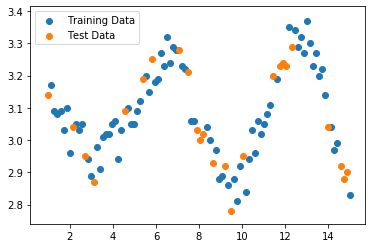

In [80]:
#do a train/test split of the data
x = reg["x"]
y = reg["y"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
plt.scatter(xtrain, ytrain, label="Training Data")
plt.scatter(xtest, ytest, label="Test Data")
plt.legend()

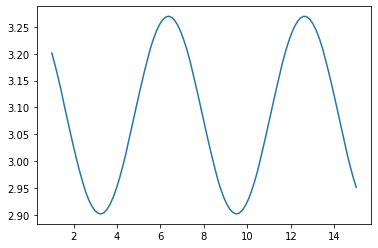

In [83]:
#Fit the data using the training set and scipy.optimize.curve_fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(spicyCosine, xtrain, ytrain)
ypredict = spicyCosine(x, popt[0], popt[1], popt[2], popt[3])
plt.plot(xplot, ypredict)

In [39]:
#Calculate the MSE with the optimized parameters on the test set
mse = mean_squared_error(y, ypredict)
mse

0.0031779403820693048

In [48]:
#Calculate the MSE over 100 train/test splits
#Get the mean and standard deviation of the MSE
mse = [0] * 100
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    popt, pcov = curve_fit(spicyCosine, xtrain, ytrain)
    ypredict = spicyCosine(x, popt[0], popt[1], popt[2], popt[3])
    mse[i] = mean_squared_error(y, ypredict)
    
std = np.std(mse)
mean = np.mean(mse)
std, mean

(4.128347765043759e-05, 0.003157906950533039)

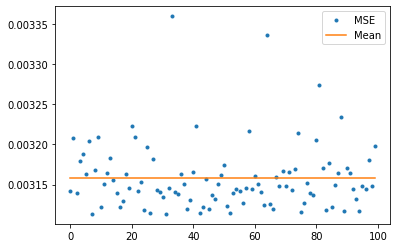

In [58]:
#Plot the MSEs
plt.plot(np.arange(100), mse, linestyle="none", marker=".", label="MSE")
plt.plot(np.arange(100), [mean] * 100, label="Mean")
plt.legend()

In [67]:
#Bringing back our predict/MSE function 
def degreePredictMSE(degree, xtrain, xtest, ytrain, ytest):
    fit = np.polyfit(xtrain, ytrain, degree)
    predictedValues = np.polyval(fit, xtest)
    mse = mean_squared_error(ytest, predictedValues)
    return fit, mse


# Since our favorite was the 9th degree polynomial, let's get 100 MSEs from it
polyMSE = [0] * 100 
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    fit, polyMSE[i] = degreePredictMSE(9, xtrain, xtest, ytrain, ytest)
polyMSEMean = np.mean(polyMSE)

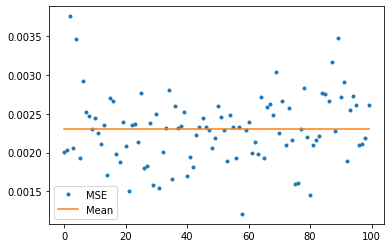

In [68]:
plt.plot(np.arange(100), polyMSE, marker=".", linestyle="none", label="MSE")
plt.plot(np.arange(100), [polyMSEMean] * 100, label="Mean")
plt.legend()

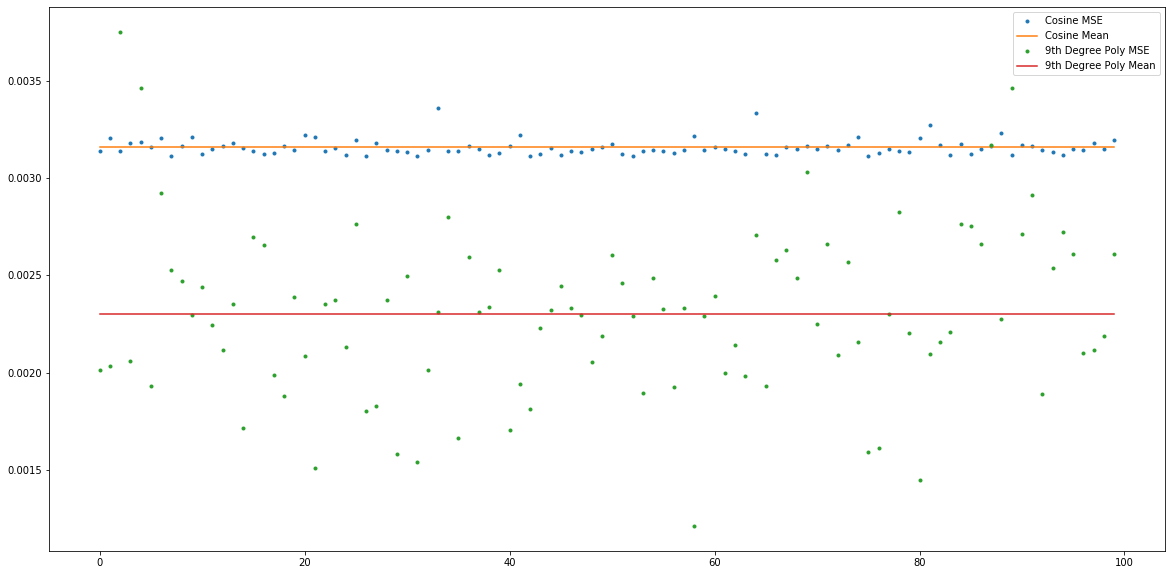

In [98]:
#Compare the MSE means
plt.plot(np.arange(100), mse, linestyle="none", marker=".", label="Cosine MSE")
plt.plot(np.arange(100), [mean] * 100, label="Cosine Mean")
plt.plot(np.arange(100), polyMSE, marker=".", linestyle="none", label="9th Degree Poly MSE")
plt.plot(np.arange(100), [polyMSEMean] * 100, label="9th Degree Poly Mean")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20,10)



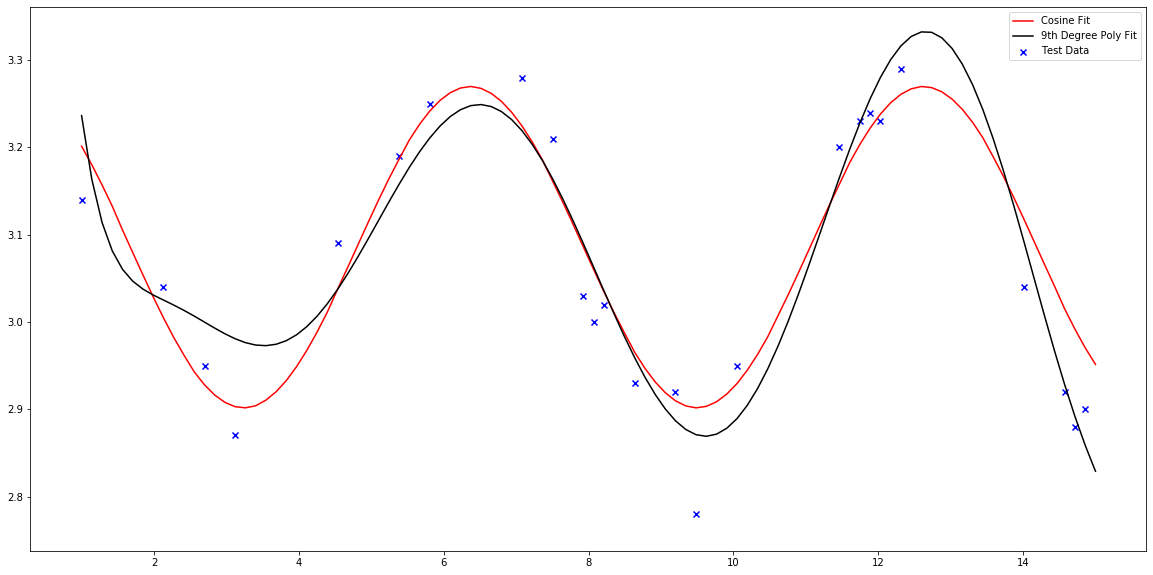

In [97]:
# Plot the resulting fits together along with the test data.
fit = np.polyfit(xtrain, ytrain, 9)
ypolyPredict = np.polyval(fit, xplot)
plt.scatter(xtest,ytest, label="Test Data", color="blue", marker="x")
plt.plot(xplot, ypredict, label="Cosine Fit", color="red")
plt.plot(xplot, ypolyPredict, label="9th Degree Poly Fit", color="black")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20,10)

From comparing the MSE means of the 9th degree polynomial and our cosine function, we can conclude that the 9th degree polynomial fit is the btter fit due to its lower overall MSE over 100 train/test splits.